# Prediction of COVID-19 diagnosis based on symptoms

## Introduction

The COVID-19 pandemic has presented an immense challenge to healthcare systems worldwide, highlighting the need for accurate and efficient methods of diagnosing the disease. While laboratory tests such as polymerase chain reaction (PCR) and antigen tests have been pivotal in detecting the presence of the SARS-CoV-2 virus, they often require specialized equipment, time-consuming processes, and limited testing capacity. As a result, there is a growing demand for alternative approaches that can leverage readily available data, such as symptoms, to predict COVID-19 diagnosis.

The aim of this project is, prediction of COVID-19 diagnosis based on symptoms, focusing specifically on symptoms as the input data. By analyzing large-scale datasets encompassing diverse populations, clinical records, and symptom profiles, we intend to identify patterns and correlations that can enable accurate predictions of COVID-19 status.

**Importance of the project**

accurate disease prediction based on symptoms, such as Prediction of COVID-19 diagnosis based on symptoms, is crucial in today's world. It allows for early identification, optimized resource management, proactive public health measures, early intervention, personalized care, and informed decision-making. By improving disease prediction accuracy, we can enhance medical treatment and contribute to better health outcomes for individuals and communities.

**Impact of the project**

The implementation of an effective screening tool based on accurate disease prediction can have a profound impact on the medical field, particularly in terms of screening efficiency and reducing the burden on healthcare systems. The implementation of an accurate disease prediction model for effective screening has the potential to revolutionize the medical field. It improves screening efficiency, enables early detection and intervention, optimizes resource allocation, reduces the burden on healthcare systems, and leads to cost savings. By enhancing the effectiveness and efficiency of screening processes, healthcare providers can deliver better care to patients, reduce healthcare burden, and improve overall healthcare outcomes.

**Future of the project**

While the proposed method focuses specifically on predicting COVID-19 diagnosis based on symptoms, it has the potential to be adapted and applied to other infectious diseases in the future. The methodology and principles employed in this project can serve as a foundation for developing predictive models for different diseases. The proposed method can address knowledge gaps by providing a framework for predicting COVID-19 diagnosis based on symptoms. This framework can be adapted and applied to other diseases by leveraging transfer learning, feature engineering, and data integration. By utilizing the knowledge gained from the development and implementation of the COVID-19 predictive model, future disease prediction efforts can be accelerated, contributing to improved diagnostic capabilities and public health preparedness.

**Hypothesis**

Based on the dataset provided which includes variables such as various symptoms, Corona result, Age_60_above, Gender, and Known_contact details, we can make initial hypotheses:
    1.	Contact with positive person will result in covid result positive
    2.	As I had covid in the pandemic I can tell shortness of breath, fever and cough sumptoms were main symptoms among positive patients.


## Data Analysis

### 1. Importing the Modules

In [55]:
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore") # ignoring wranings

### 2. Reading the Dataset

In [56]:
#reading the dataset
covid_tested_raw = pd.read_csv("corona_tested_006.csv")
covid_tested = covid_tested_raw.copy() #creating a copy of dataset

In [57]:
#getting shape of dataset provided
covid_tested.shape

(278848, 11)

Here , we have 2,78,848 observations and 11 variables.

### 3. Checking First 5 and last 5 rows of DataSet

In [58]:
covid_tested.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [59]:
covid_tested.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


* We can't see null values in data , but there are records with value as None in Age and Sex column.

### 4. Checking number of features and their Datatypes.

In [60]:
covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**Observations**
* We have all the columns of Object Datatype , except Ind_ID column which is of integer datatype.
* And , we have no null values in any column.

In [61]:
#getting statistical summary of data
covid_tested.describe(include = "all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
* we have unique values in various columns , we will address those in further data cleaning processes.

### 5. Data Cleaning

In [62]:
#checking for duplicates in data
covid_tested.duplicated().sum()

0

* There are no duplicates in the dataset.

In [63]:
covid_tested.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

**5.1 Dropping unwanted Columns**

* 'Ind_ID' and 'Test_date' which we don't need in our analysis and in model building.
* As per our business requirement , we have to divide the dataset in training set and Testing set based on Test_date , so we will keep this column now and drop it before model building and diving dataset into Training set and Test set.
* Corona is our Outcome variable.
* For now , we will drop 'Ind_ID' column.

In [64]:
#dropping 'Ind_ID' Column.
covid_tested = covid_tested.drop(['Ind_ID'] , axis = 1)

In [65]:
covid_tested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [66]:
#checking for null values
covid_tested.isnull()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,False,False
278844,False,False,False,False,False,False,False,False,False,False
278845,False,False,False,False,False,False,False,False,False,False
278846,False,False,False,False,False,False,False,False,False,False


In [67]:
#getting total number of null values.
covid_tested.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**We have no null values in dataset**

In [68]:
covid_tested.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
Known_contact           3
dtype: int64

In [69]:
#viewing the unique values in each variables
pd.Series({c: covid_tested[c].unique() for c in covid_tested})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

**Observations :** We can see repetition of data in Uppercase and Lowercase in all symptoms columns.Let's check this out in number of values

In [70]:
for c in covid_tested.columns:
    print("---- %s ---" % c)
    print(covid_tested[c].value_counts())

---- Test_date ---
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
1

**Observations**
* In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to address these as we have to rename and make it to True and False only.
* We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.
* As these values are null values , but not recognised as Null value.
* Let's clean each column separately

**5.2 Cough Symptoms Column**

In [71]:
covid_tested['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [72]:
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

**We have value as "None" in 252 records , we need to impute these values or drop it.**
**As this contain categorical values , we can't use mean imputation or KNN imputation.**
**Imputing it with Mode(which is False) might make our data bias.**
* **That's why I will prefer to drop these records.**

**Before that I want to check relation between "Cough_symptoms" column and "Corona" column. We have a label column named "Corona" , we also have value as "Other" in that column. So , let's  check if there is a relation between "other"value of corona column and  in "None" value of Cough_symptoms and "Fever" Column.**

In [73]:
covid_tested[covid_tested["Cough_symptoms"] == "None"]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
68,11-03-2020,None,FALSE,TRUE,FALSE,FALSE,positive,None,None,Abroad
281,11-03-2020,None,None,FALSE,FALSE,FALSE,positive,None,None,Abroad
577,12-03-2020,None,None,None,None,None,positive,None,None,Other
2664,15-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
4442,16-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
95936,04-04-2020,None,None,False,False,False,negative,No,male,Other
95937,04-04-2020,None,None,False,False,False,negative,No,female,Other
95938,04-04-2020,None,None,False,False,False,negative,Yes,male,Other
95939,04-04-2020,None,None,False,False,False,negative,No,female,Other


I thought there might be relation between "None" value from "Cough_symptoms" column and "other" value of "Corona" column.
But , I don't see any relation between them

**Dropping rows with "None" value in "Cough_symptoms" column.**

In [74]:
covid_tested = covid_tested[covid_tested.Cough_symptoms != "None"]

In [75]:
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [76]:
covid_tested['Cough_symptoms'].unique()

array([True, False], dtype=object)

**5.3 Fever Column**

In [77]:
covid_tested['Fever'].value_counts()

False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

In [78]:
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Fever'].value_counts()

False    256843
True      21751
None          2
Name: Fever, dtype: int64

**Imputation of "None" value**

* We had "None" value in 252 records previously but after dropping 252 rows of containing "None" value in Cough_symptoms column ,we are now left with 2 rows with "None" value in Fever column.
* as this is categorical column , we can impute this value with mode.
* We have 256843 records with False value and only 21751 records with True value , there is a high probabolity that the record to be False.
* There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [79]:
covid_tested['Fever'].mode()

0    False
Name: Fever, dtype: object

In [80]:
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : False if x == 'None' else x)
covid_tested['Fever'].value_counts()

False    256845
True      21751
Name: Fever, dtype: int64

**5.4 Sore throat Column**

In [81]:
covid_tested['Sore_throat'].value_counts()

False    212358
FALSE     64316
TRUE       1194
True        728
Name: Sore_throat, dtype: int64

In [82]:
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Sore_throat'].value_counts()

False    276674
True       1922
Name: Sore_throat, dtype: int64

**5.5 Shortness of Breath Column**

In [83]:
covid_tested['Shortness_of_breath'].value_counts()

False    212616
FALSE     64406
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

In [84]:
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Shortness_of_breath'].value_counts()

False    277022
True       1574
Name: Shortness_of_breath, dtype: int64

**5.6 Headache Column**

In [85]:
covid_tested['Headache'].value_counts()

False    212100
FALSE     64086
TRUE       1424
True        986
Name: Headache, dtype: int64

In [86]:
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Headache'].value_counts()

False    276186
True       2410
Name: Headache, dtype: int64

In [87]:
covid_tested.describe(include = 'all')

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278596,278596,278596,278596,278596,278596,278596,278596,278596,278596
unique,51,2,2,2,2,2,3,3,3,3
top,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,10921,236368,256845,276674,277022,276186,260008,127315,130031,242506


**5.7 Age_60_above Column**

In [88]:
covid_tested["Age_60_above"].value_counts()

None    127315
No      125506
Yes      25775
Name: Age_60_above, dtype: int64

**Observations :**
* we have a lot of values with value as "None".
* There might be the reason behind "None" value , when patient's age is unknown or patient may not be comfortale with telling his age.
* we can rename the value of "None" as "Unknown" .


In [89]:
#renaming "None" value to "Unknown".
covid_tested['Age_60_above'] = covid_tested['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Age_60_above'].value_counts()

Unknown    127315
No         125506
Yes         25775
Name: Age_60_above, dtype: int64

**5.8 Sex Column.**

In [90]:
covid_tested['Sex'].value_counts()

female    130031
male      129013
None       19552
Name: Sex, dtype: int64

**Observations :**
* we have a lot of values with value as "None".
* There might be the reason behind "None" value , when patient's sex is unknown.
* we can rename the value of "None" as "Unknown" .


In [91]:
#renaming "None" value to "Unknown".
covid_tested['Sex'] = covid_tested['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Sex'].value_counts()

female     130031
male       129013
Unknown     19552
Name: Sex, dtype: int64

**5.9 Known_contact Column**

In [92]:
covid_tested["Known_contact"].value_counts()

Other                     242506
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

**5.10 corona Column(Outcome Variable)**

In [93]:
covid_tested['Corona'].value_counts()

negative    260008
positive     14696
other         3892
Name: Corona, dtype: int64

**Observations :**
* We have three values in our outcome variable. positive , negative and other.
* As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.
* So , we don't need to train our model for "other" value.
* And , we have less than 1% of total records as "other" value.
* So , we can drop it.


In [94]:
covid_tested = covid_tested[covid_tested.Corona != "other"]
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [95]:
covid_tested['Corona'].value_counts()

negative    260008
positive     14696
Name: Corona, dtype: int64

**Observations :**
* After Data cleaning , we are now left with 274704 records

**5.11 Saving the cleaned dataset**

In [96]:
covid_tested.to_csv("covid_cleaned.csv")

## 6. Exploratory Data Analysis

**6.1 Checking for Data Imbalance**

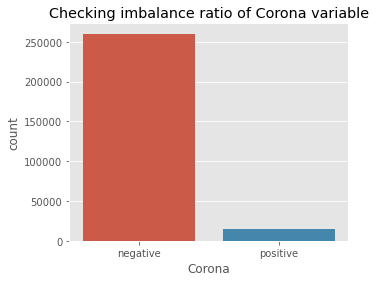

In [97]:
# checking the imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=covid_tested, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()

In [98]:
# checking exact Corona Positive to Corona negative ratio
covid_tested[covid_tested.Corona=='negative'].shape[0]/covid_tested[covid_tested.Corona=='positive'].shape[0]

17.692433315187806

**Observations :**
**1 in every 17 patients is Corona Positive.**

In [99]:
# inspecting Corona column
print(covid_tested['Corona'].value_counts())
print()
print(covid_tested['Corona'].value_counts(normalize=True))

negative    260008
positive     14696
Name: Corona, dtype: int64

negative    0.946502
positive    0.053498
Name: Corona, dtype: float64


**Observations :**
* 94.6% of the patients are Covid Negative.
* 5.4% Patients are Covid positive.
* Our data is highly imbalance

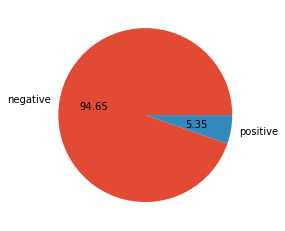

In [100]:
plt.pie(covid_tested['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

**Encoding Outcome Variable(Corona)**

In [101]:
#Encoding Corona column
covid_tested['Corona'] = covid_tested['Corona'].map({'negative' : 0 , 'positive' : 1}) 

**Creating new dataframe with Corona value**

In [102]:
# creating new dataframe with Corona value 
df_positive = covid_tested[covid_tested['Corona'] == 1]
df_negative = covid_tested[covid_tested['Corona'] == 0]

**Univariate Analysis**

In [103]:
covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274704 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274704 non-null  object
 1   Cough_symptoms       274704 non-null  object
 2   Fever                274704 non-null  bool  
 3   Sore_throat          274704 non-null  bool  
 4   Shortness_of_breath  274704 non-null  bool  
 5   Headache             274704 non-null  bool  
 6   Corona               274704 non-null  int64 
 7   Age_60_above         274704 non-null  object
 8   Sex                  274704 non-null  object
 9   Known_contact        274704 non-null  object
dtypes: bool(4), int64(1), object(5)
memory usage: 15.7+ MB


In [104]:
# checking all columns with object type data other than "Corona" Column and storing it in a list
obj_plot=list(covid_tested.columns[(covid_tested.dtypes=="object") | (covid_tested.dtypes=="bool")])
obj_plot

['Test_date',
 'Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [105]:
# checking each columns underlying groups
for i in obj_plot:
    # for patients with Corona positive
    print("--------------------------------------------------")
    print(f"{i} for patients with Corona positive")
    print(df_positive[i].value_counts().sort_values(ascending = False))
    # for patients with Corona negative
    print(f"\n{i} for patients with Corona negative")
    print(df_negative[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
Test_date for patients with Corona positive
31-03-2020    729
01-04-2020    681
02-04-2020    615
30-03-2020    611
26-03-2020    542
27-03-2020    516
05-04-2020    505
03-04-2020    504
25-03-2020    486
07-04-2020    483
04-04-2020    441
28-03-2020    439
13-04-2020    431
29-03-2020    428
06-04-2020    394
23-03-2020    388
24-03-2020    377
10-04-2020    356
14-04-2020    354
12-04-2020    290
11-04-2020    290
09-04-2020    288
19-04-2020    279
08-04-2020    274
22-03-2020    271
15-04-2020    259
23-04-2020    256
18-04-2020    237
21-04-2020    233
16-04-2020    233
20-04-2020    225
17-04-2020    207
22-04-2020    204
21-03-2020    192
20-03-2020    170
24-04-2020    169
19-03-2020    157
30-04-2020    153
18-03-2020    135
27-04-2020    129
28-04-2020    115
17-03-2020     92
26-04-2020     92
25-04-2020     91
16-03-2020     90
29-04-2020     75
15-03-2020     55
12-03-2020     39
13-03-2020     39
11-03-2020     39
14-03

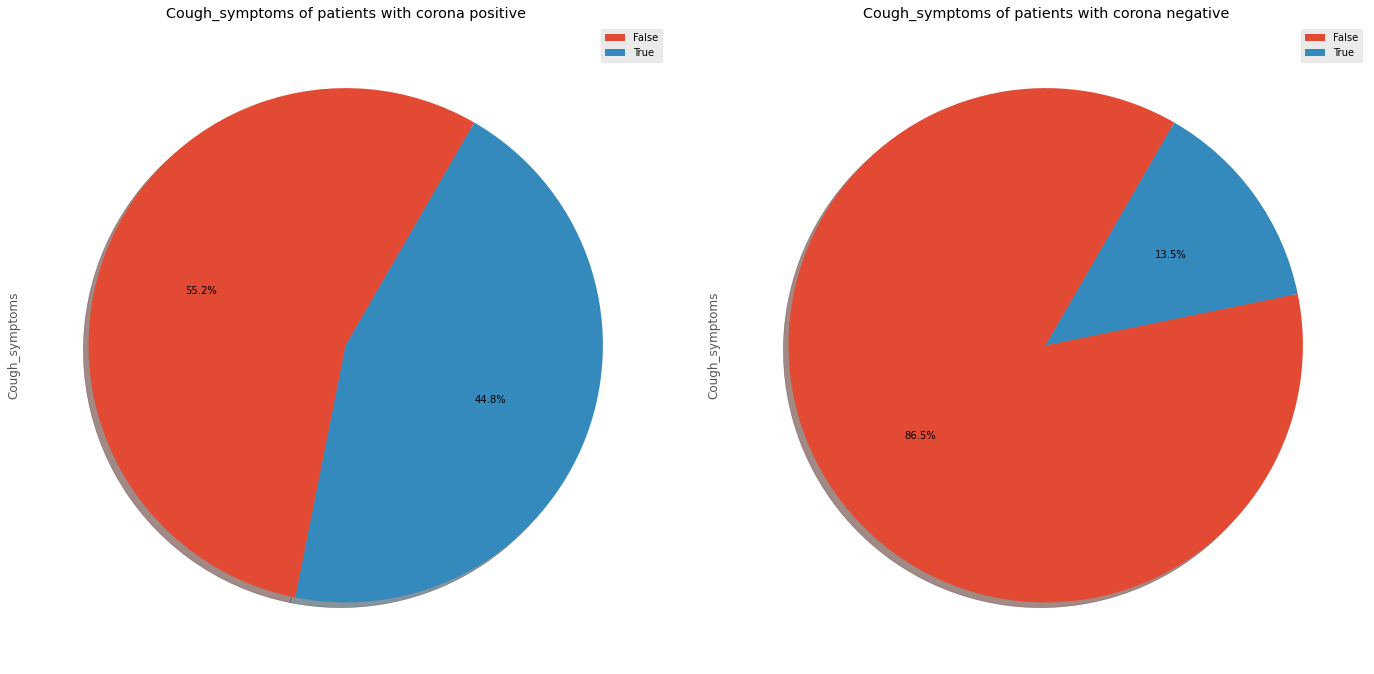

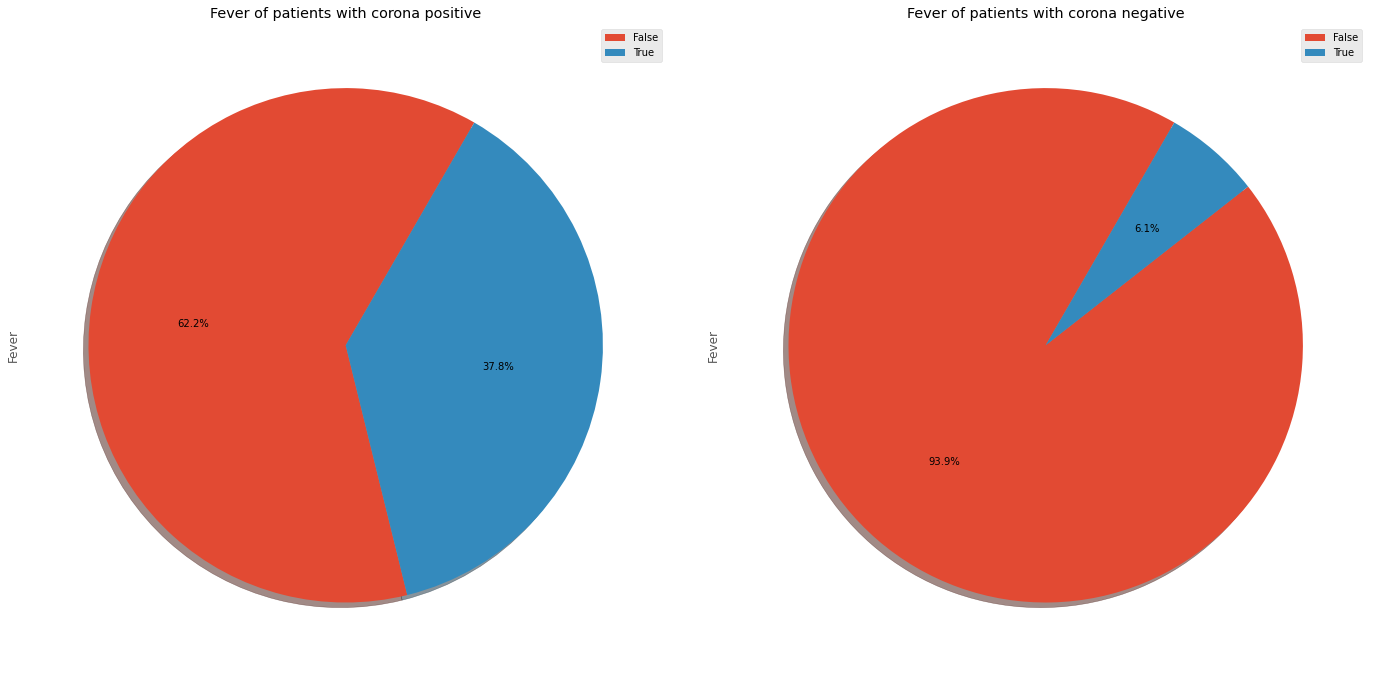

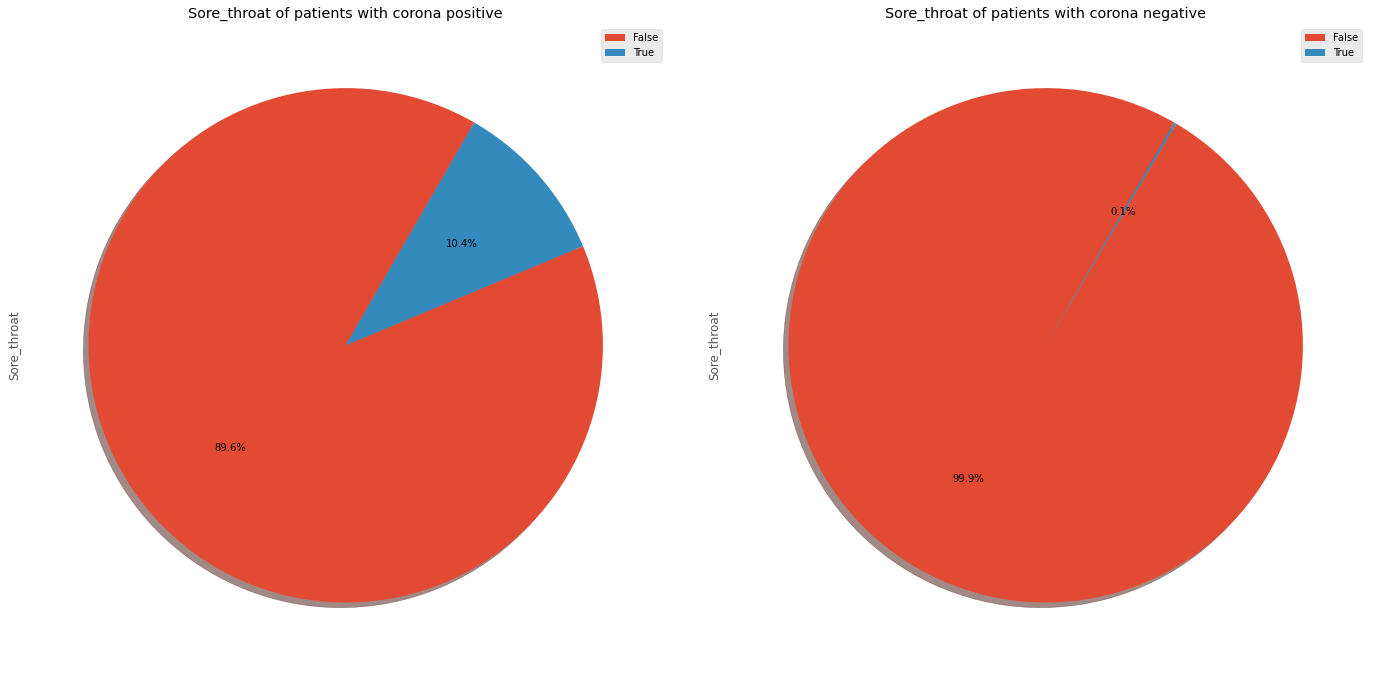

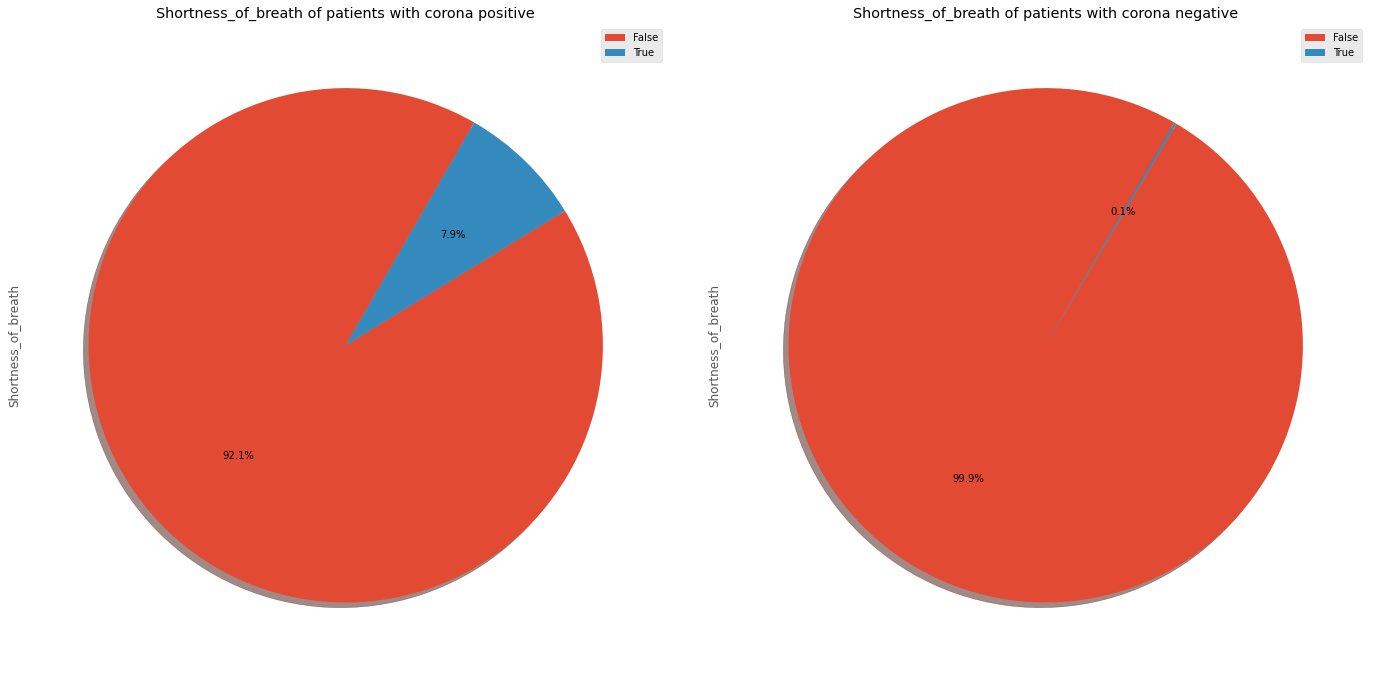

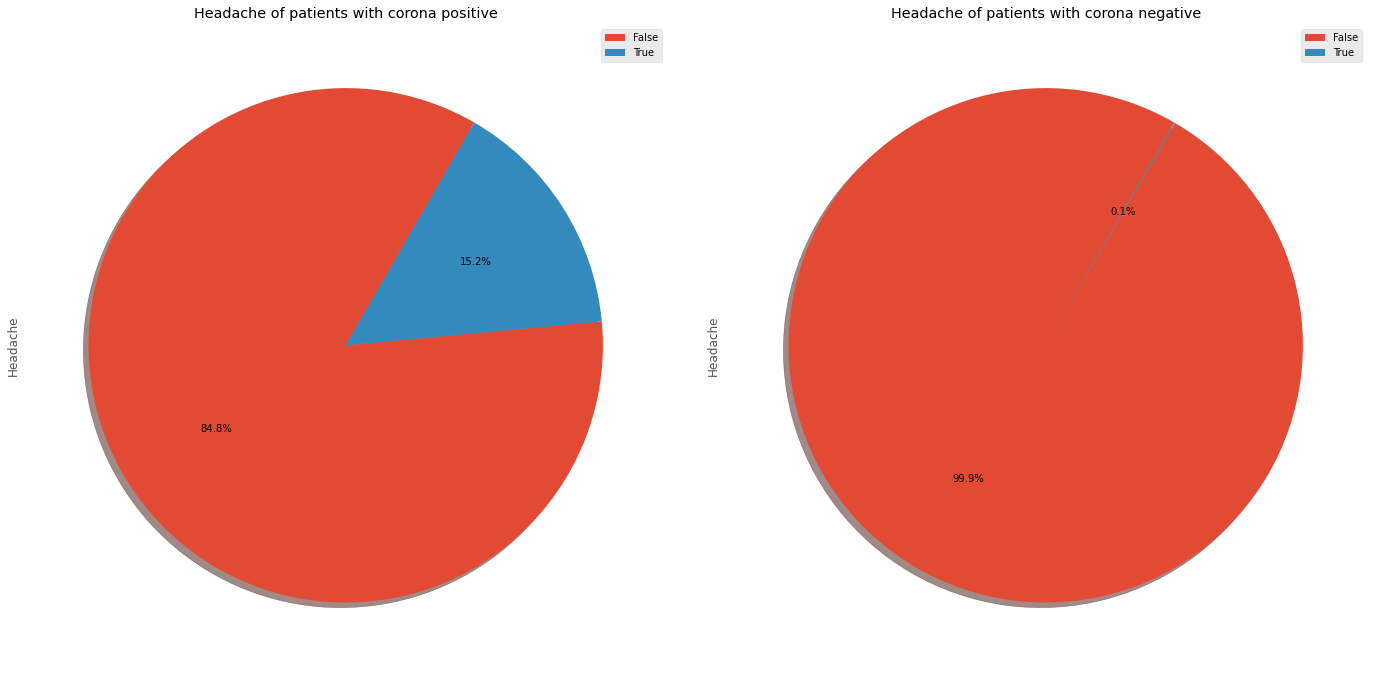

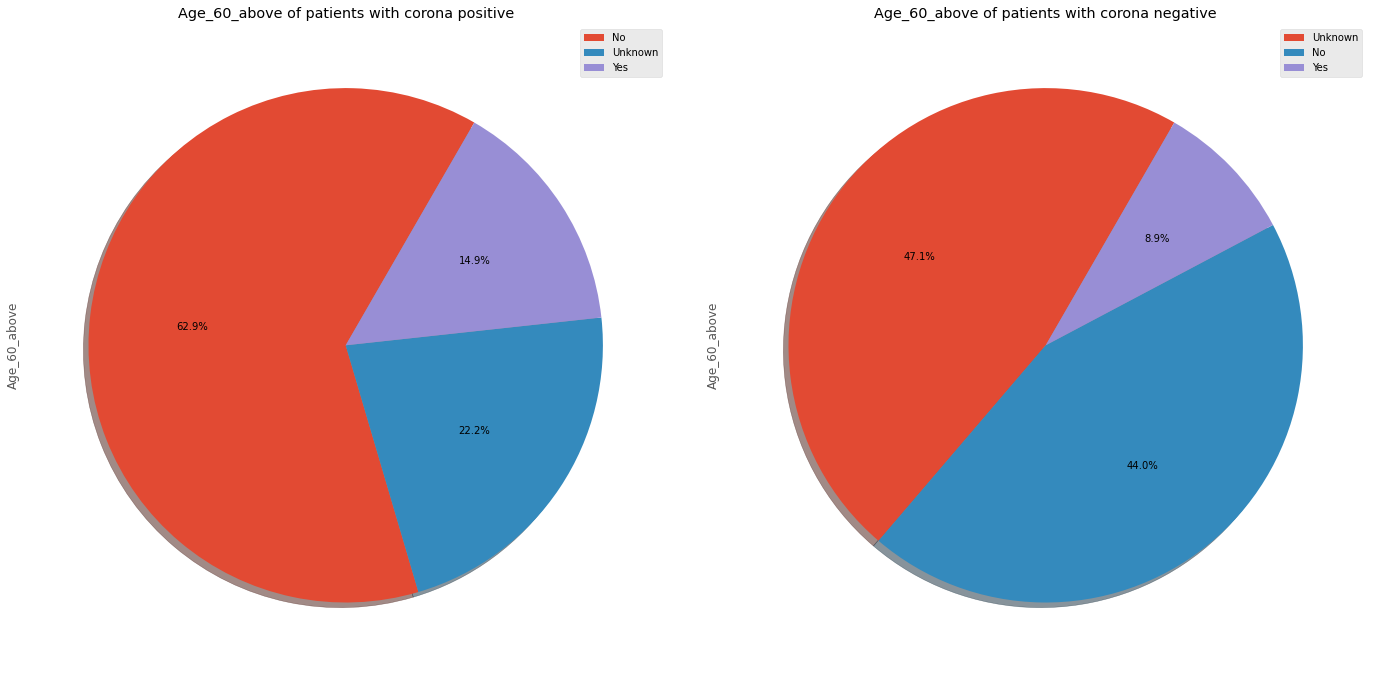

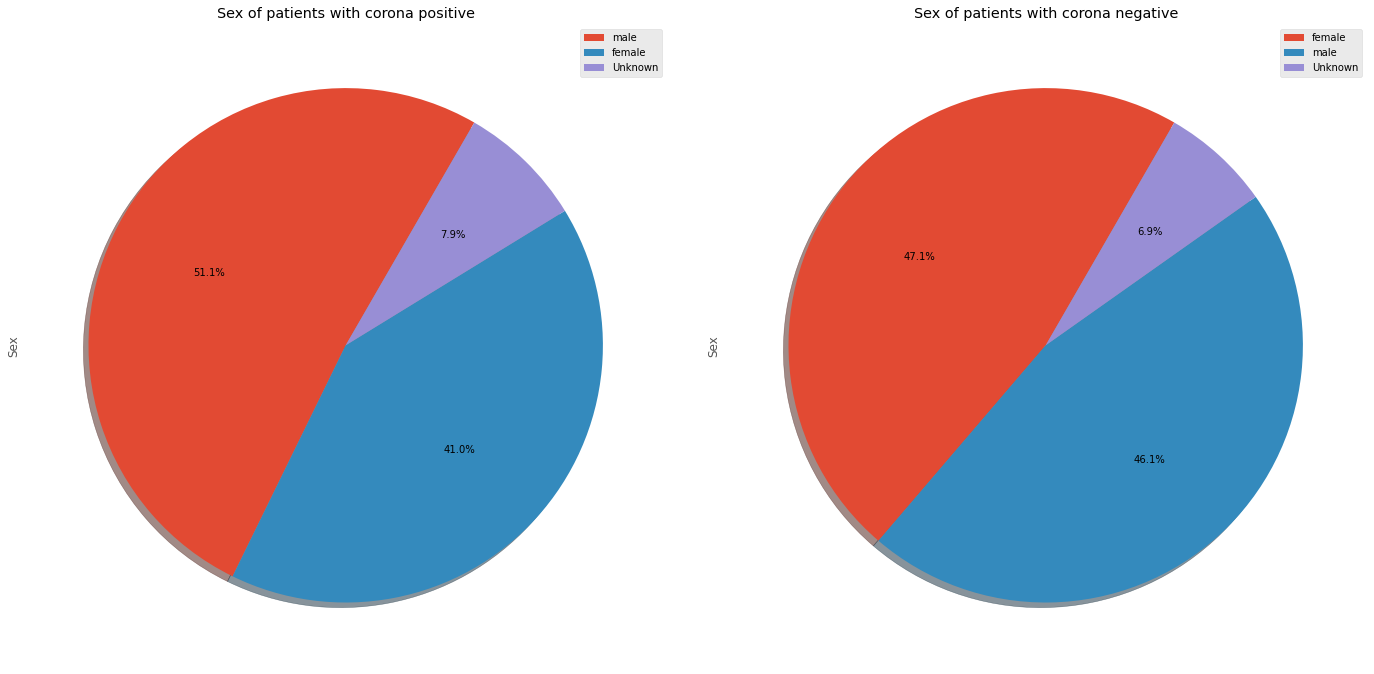

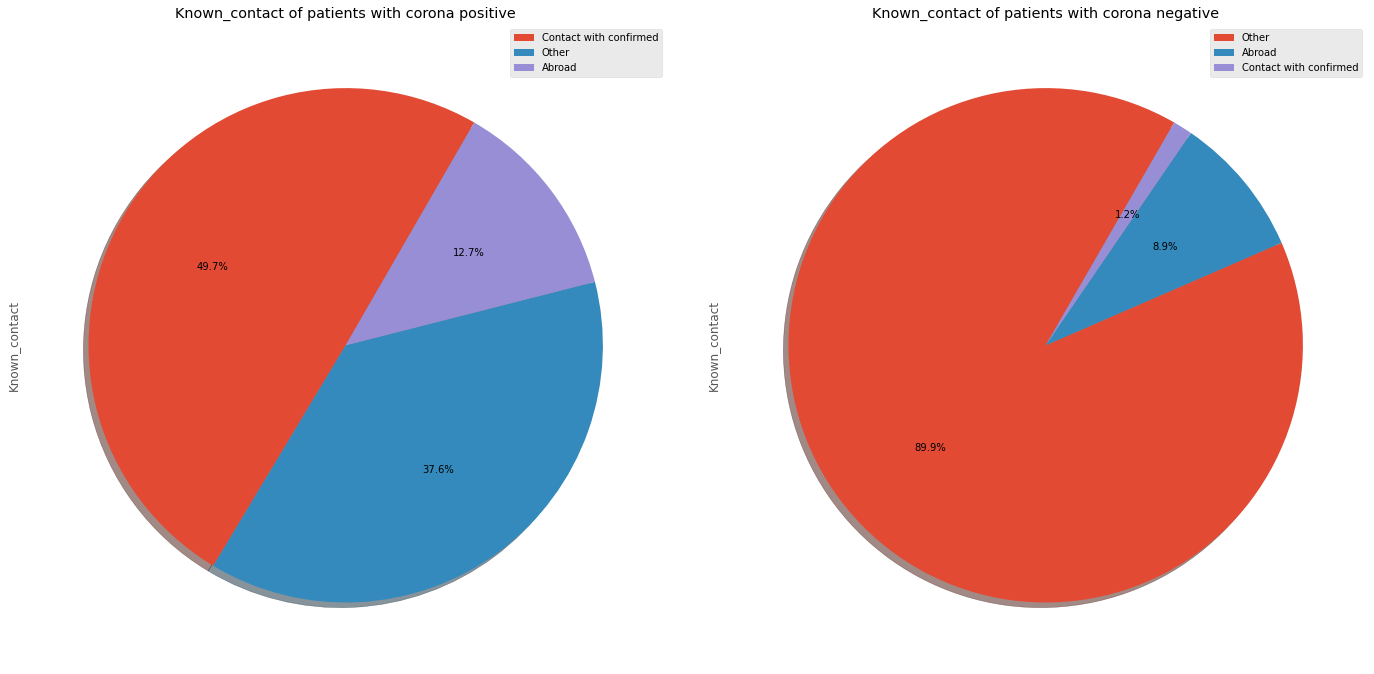

In [106]:
#plotting pie chart with symptoms and corona positive or negative 
p_plot=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for patients with corona positive
    plt.subplot(1,2,1)
    plt.title(f'{i} of patients with corona positive')
    df_positive[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for patients with corona negative
    plt.subplot(1,2,2)
    plt.title(f'{i} of patients with corona negative')
    df_negative[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

**Observations :**

* Cough_Symptoms and Fever are the most common symptoms among Corona positive patients.

* Almost 50% of Corona Positive patients have Known_Contact Abroad.

* Among corona positive patients male are more than females.

* Sore_throat, Shortness_of breath and Headache these symptoms are not in Corona negative patients.

* Cough and Fever are the most common symptoms among COVID positive males whose known contact was abroad.

* Headache, Shortness of Breath, Sore throat symptom was less common among COVID negative people.

* In April we found most number of corona positive cases(8863), And in march 5863 corona positive cases.

* There are 121 corona negative patients who have fever and Sore throat.

* There are 1162 corona patients who faced shortness of breath.

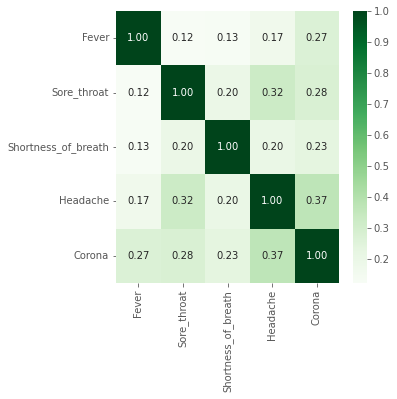

In [107]:
corr_df= covid_tested.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [108]:
covid_tested.corr()

,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
Fever,1.000000,0.122233,0.125840,0.169681,0.266607
Sore_throat,0.122233,1.000000,0.195181,0.323201,0.278442
Shortness_of_breath,0.125840,0.195181,1.000000,0.201992,0.233399
Headache,0.169681,0.323201,0.201992,1.000000,0.367475
Corona,0.266607,0.278442,0.233399,0.367475,1.000000


**Observations :**
* we can't see any two symptoms with high correlation.